In [242]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Makes it so that you can scroll horizontally to see all columns of an output DataFrame
pd.set_option('display.max_columns', None)

# This magic function allows you to see the charts directly within the notebook. 
%matplotlib inline

# This command will make the plots more attractive by adopting the commone style of ggplot
matplotlib.style.use("ggplot")

Question 1. What percentage of undergraduate college students attend for-profit schools?

In [243]:
# for recreating this analysis, place the CSV data file in the same directory
#author: Gavish Gulati, gavish@umd.edu
#Created on 02/22/2016
main_data = pd.read_csv("main_data.csv")
#taking only those values which are not null
ugds = main_data[main_data["UGDS"].notnull()]
#adding the values in column UGDS
total_students = ugds["UGDS"].sum()
#calculating the number of undergrad students who are enrolled in for-profit institution with control = 3
control = (ugds[ugds["CONTROL"] == 3])["UGDS"].sum()
print"Percentage of undergraduate students attedning for-profit schools:"
control/total_students

Percentage of undergraduate students attedning for-profit schools:


0.1060886593309403

Question 2. In comparing "public", "private", and "for-profit" schools which type of school has the highest median completion rate for students? Create a bar chart that shows the comparison (be sure to use appropriately labeled axes, tick marks, title, and colors).

For-profit colleges have the highest median competion rate


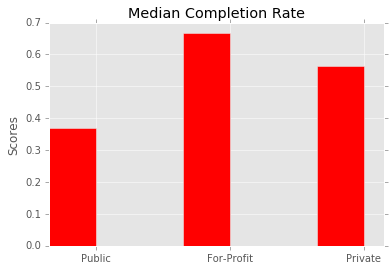

In [244]:
main_data = pd.read_csv("main_data.csv")
#taking only those values which are not null
c200_4 = main_data[main_data["C200_4"].notnull()]
#modifying variable by ignoring all the values except C200_4 column values
c200_4 = c200_4["C200_4"]
#doing the same logic for schools with less than 4 year programs
c200_l4 = main_data[main_data["C200_L4"].notnull()]
c200_l4 = c200_l4["C200_L4"]
#logic for calculating median
var = [c200_4, c200_l4]
result = pd.concat(var)
median = np.median(result)
#-------------------------------------
#taking only those values which are not null
#Taking values for for-proft Univ
c200_4 = main_data[main_data["C200_4"].notnull()]
c200_4_profit = (c200_4[c200_4["CONTROL"] == 3])["C200_4"]

c200_l4 = main_data[main_data["C200_L4"].notnull()]
c200_4_lprofit = (c200_l4[c200_l4["CONTROL"] == 3])["C200_L4"]
#c200_4_profit
var = [c200_4_profit,c200_4_lprofit]
result = pd.concat(var)
median_profit = np.median(result) 
#-------------------------------------------------------------------
#taking only those values which are not null
#Taking values for Private non profit
c200_4_private = (c200_4[c200_4["CONTROL"] == 2])["C200_4"]
c200_4_lprivate = (c200_l4[c200_l4["CONTROL"] == 2])["C200_L4"]
var_private = [c200_4_private, c200_4_lprivate]
result_private = pd.concat(var_private)
median_private = np.median(result_private)

#--------------------------------------------------------------------
#taking only those values which are not null
#Taking values for Public
c200_4_public = (c200_4[c200_4["CONTROL"] == 1])["C200_4"]
c200_4_lpublic = (c200_l4[c200_l4["CONTROL"] == 1])["C200_L4"]
var_public = [c200_4_public, c200_4_lpublic]
result_public = pd.concat(var_public)
median_public = np.median(result_public)

#Logic for plotting the values on a bar-chart
y = [median_public,median_profit,median_private]
N = 3
ind = np.arange(N) 
width = 0.35
fig, ax = plt.subplots()
#Setting labels and color
rects1 = ax.bar(ind, y, width, color='r')
ax.set_ylabel('Scores')
ax.set_title('Median Completion Rate')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Public', 'For-Profit', 'Private'))

print "For-profit colleges have the highest median competion rate"

Question 3. Among predominently four-year schools, what is the median debt of graduates in dollars? Do men or women typically
have higher debt and by how much?

In [245]:
#Taking values where predominant degree is bachelors i.e. PREDDEG = 3
#also calculating med debt for male and applying necessary filters
#17500

predeg_3 = main_data[main_data["PREDDEG"] == 3]
debt_grad = predeg_3["GRAD_DEBT_MDN"]
debt_grad = debt_grad.replace(r'PrivacySuppressed', np.nan, regex=True)
debt_grad = debt_grad[debt_grad.notnull()]
debt_grad = map(float, debt_grad)
med_debt_grad = np.median(debt_male)
print "Median debt for grad students is:"
print med_debt_grad
debt_male = predeg_3["MALE_DEBT_MDN"]
debt_male = debt_male.replace(r'PrivacySuppressed', np.nan, regex=True)
debt_male = debt_male[debt_male.notnull()]
debt_male = map(float, debt_male)
med_debt_male = np.median(debt_male)

#----------------------------------------------------------
#doing the same logic for women
debt_female = predeg_3["FEMALE_DEBT_MDN"]
debt_female = debt_female.replace(r'PrivacySuppressed', np.nan, regex=True)
debt_female = debt_female[debt_female.notnull()]
debt_female = map(float, debt_female)
med_debt_female = np.median(debt_female)
print "Women have higher debt by:"
print med_debt_female - med_debt_male;

Median debt for grad students is:
16361.25
Women have higher debt by:
1888.75


How do predominently four-year schools compare to predominently two-year schools in terms of the percentage of students that are unable to repay even $1 of their loan within three years of graduation? Amongst all four-year schools and excluding schools with a "special focus" according to the Carnegie classification, which school has the highest percentage of such students?

In [246]:
#Extracting the fraction of student who are unable to pay 1$ after 3 years and filtering out irrelevant data(predeg= 3)
rpy_3yr = predeg_3["RPY_3YR_RT"]
rpy_3yr = rpy_3yr.replace(r'PrivacySuppressed', np.nan, regex=True)
rpy_3yr = rpy_3yr[rpy_3yr.notnull()]
#converting to float for median calculation
rpy_3yr = map(float, rpy_3yr)
med_rpy_3yr = np.median(rpy_3yr)
#------------------------------------------------------------------
#Extracting the fraction of student who are unable to pay 1$ after 3 years and filtering out irrelevant data(predeg= 1)
predeg_1 = main_data[main_data["PREDDEG"] == 1]
rpy_1yr = predeg_1["RPY_3YR_RT"]
rpy_1yr = rpy_1yr.replace(r'PrivacySuppressed', np.nan, regex=True)
rpy_1yr = rpy_1yr[rpy_1yr.notnull()]
rpy_1yr = map(float, rpy_1yr)
med_rpy_1yr = np.median(rpy_1yr)
print "Students in 2 year school that have not paid 1$ to their loans after 3 years of graduation are:" 
print 1 - med_rpy_1yr
print "Students in 4 year school that have not paid 1$ to their loans after 3 years of graduation are:"
print 1 - med_rpy_3yr
#----------------------------------------------------------------------
#logic for excluding values where CCBASIC values are for special focus institutions
exclude_carnegie = predeg_3[predeg_3["CCBASIC"] != 24]  
exclude_carnegie = exclude_carnegie[exclude_carnegie["CCBASIC"] != 25]  
exclude_carnegie = exclude_carnegie[exclude_carnegie["CCBASIC"] != 26]  
exclude_carnegie = exclude_carnegie[exclude_carnegie["CCBASIC"] != 27]  
exclude_carnegie = exclude_carnegie[exclude_carnegie["CCBASIC"] != 28]  
exclude_carnegie = exclude_carnegie[exclude_carnegie["CCBASIC"] != 29]  
exclude_carnegie = exclude_carnegie[exclude_carnegie["CCBASIC"] != 30]  
exclude_carnegie = exclude_carnegie[exclude_carnegie["CCBASIC"] != 31]  
exclude_carnegie = exclude_carnegie[exclude_carnegie["CCBASIC"] != 32]
#Extracting only 3 variable mainly name, carnegie classification and fraction of students able to pay 1$ in 3 years
exclude_carnegie = exclude_carnegie[["INSTNM","CCBASIC","RPY_3YR_RT"]]
exclude_carnegie = exclude_carnegie.replace(r'PrivacySuppressed', np.nan, regex=True)
exclude_carnegie = exclude_carnegie[exclude_carnegie.notnull()]
#Sorting these in ascending value based on fraction of students able to pay 1$ in 3 years.
#Therefore lowest value would have least number of loan payers
exclude_carnegie = exclude_carnegie.sort_values(by="RPY_3YR_RT", ascending=True)
print "According to this, below given college has highest percentage of students who did not pay 1$ towards their loans" 
print exclude_carnegie.iloc[0]["INSTNM"]


Students in 2 year school that have not paid 1$ to their loans after 3 years of graduation are:
0.5
Students in 4 year school that have not paid 1$ to their loans after 3 years of graduation are:
0.194314478463
According to this, below given college has highest percentage of students who did not pay 1$ towards their loans
Arkansas Baptist College


Question 5. Create two histogram charts in order to compare the average annual cost of attendance for four-year schools and two-year schools (be sure to include appropriate axes, labels, and titles on the charts).

28006.0
16669.0


(0, 30000)

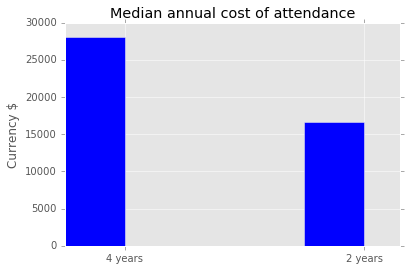

In [247]:
#Extracting annual cost of attendaance from 2 years schools(predeg_1) and 4 year schools(predeg_3)
avg_cost_2 = predeg_1["COSTT4_A"]
avg_cost_2 = avg_cost_2[avg_cost_2.notnull()]
avg_cost_4 = predeg_3["COSTT4_A"]
avg_cost_4 = avg_cost_4[avg_cost_4.notnull()]
#caluclating the median of each
med_avg_cost_2 = np.median(avg_cost_2)
med_avg_cost_4 = np.median(avg_cost_4)
print med_avg_cost_4
print med_avg_cost_2
#plotting the same on a histogram
y = [med_avg_cost_4,med_avg_cost_2]
N = 2
ind = np.arange(N) 
width = .25
fig, ax = plt.subplots()

rects1 = ax.bar(ind, y, width, color='b')
ax.set_ylabel('Currency $')
ax.set_title('Median annual cost of attendance')
ax.set_xticks(ind + width)
ax.set_xticklabels(('4 years', '2 years'))
ax.set_ylim([0,30000])

Own data-driven insight. "Do private colleges promise better salaries?"

8792.0
17476.0


[<matplotlib.text.Text at 0x290d0278>, <matplotlib.text.Text at 0x2216e860>]

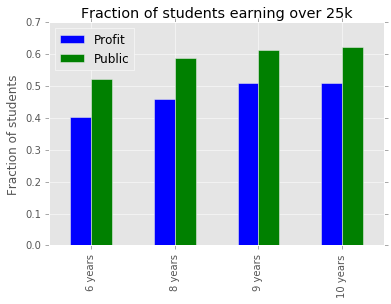

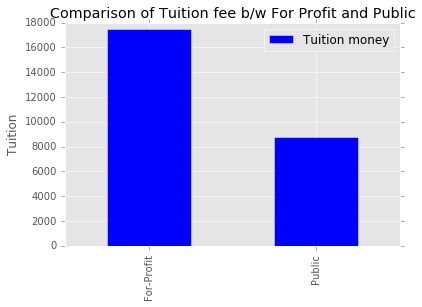

In [248]:
#seperating public, private and for-profit colleges based on CONTROL value
pvt_profit = main_data[main_data["CONTROL"] == 3]

public = main_data[main_data["CONTROL"] == 1]

pvt_non_profit = main_data[main_data["CONTROL"] == 2]
#-------------------------------------------------------
#Calculating median fraction of students earning above 25k after 6 years of graduation
pvt_profit_6 = pvt_profit["gt_25k_p6"]
pvt_profit_6 = pvt_profit_6.replace(r'PrivacySuppressed', np.nan, regex=True)
pvt_profit_6 = pvt_profit_6[pvt_profit_6.notnull()]
pvt_profit_6 = map(float, pvt_profit_6)
med_pvt_profit_6 = np.median(pvt_profit_6)
#Calculating median fraction of students earning above 25k after 8 years of graduation
pvt_profit_8 = pvt_profit["gt_25k_p8"]
pvt_profit_8 = pvt_profit_8.replace(r'PrivacySuppressed', np.nan, regex=True)
pvt_profit_8 = pvt_profit_8[pvt_profit_8.notnull()]
pvt_profit_8 = map(float, pvt_profit_8)
med_pvt_profit_8 = np.median(pvt_profit_8)
#Calculating median fraction of students earning above 25k after 9 years of graduation
pvt_profit_9 = pvt_profit["gt_25k_p9"]
pvt_profit_9 = pvt_profit_9.replace(r'PrivacySuppressed', np.nan, regex=True)
pvt_profit_9 = pvt_profit_9[pvt_profit_9.notnull()]
pvt_profit_9 = map(float, pvt_profit_9)
med_pvt_profit_9 = np.median(pvt_profit_9)
#Calculating median fraction of students earning above 25k after 10 years of graduation
pvt_profit_10 = pvt_profit["gt_25k_p10"]
pvt_profit_10 = pvt_profit_10.replace(r'PrivacySuppressed', np.nan, regex=True)
pvt_profit_10 = pvt_profit_10[pvt_profit_10.notnull()]
pvt_profit_10 = map(float, pvt_profit_10)
med_pvt_profit_10 = np.median(pvt_profit_10)
#--------------------------------------------------------------------------------------
#applying the same logic for public colleges 
public_6 = public["gt_25k_p6"]
public_6 = public_6.replace(r'PrivacySuppressed', np.nan, regex=True)
public_6 = public_6[public_6.notnull()]
public_6 = map(float, public_6)
med_public_6 = np.median(public_6)

public_8 = public["gt_25k_p8"]
public_8 = public_8.replace(r'PrivacySuppressed', np.nan, regex=True)
public_8 = public_8[public_8.notnull()]
public_8 = map(float, public_8)
med_public_8 = np.median(public_8)

public_9 = public["gt_25k_p9"]
public_9 = public_9.replace(r'PrivacySuppressed', np.nan, regex=True)
public_9 = public_9[public_9.notnull()]
public_9 = map(float, public_9)
med_public_9 = np.median(public_9)

public_10 = public["gt_25k_p10"]
public_10 = public_10.replace(r'PrivacySuppressed', np.nan, regex=True)
public_10 = public_10[public_10.notnull()]
public_10 = map(float, public_10)
med_public_10 = np.median(public_10)
#calculating the net expenses for public colleges
cost_public = public["NPT4_PUB"]
cost_public = cost_public.replace(r'PrivacySuppressed', np.nan, regex=True)
cost_public = cost_public[cost_public.notnull()]
cost_public = map(float, cost_public)
med_cost_public = np.median(cost_public)
#-------------------------------------------------------
#calculating the net expenses for private colleges
cost_pvt_profit = pvt_profit["NPT4_PRIV"]
cost_pvt_profit = cost_pvt_profit.replace(r'PrivacySuppressed', np.nan, regex=True)
cost_pvt_profit = cost_pvt_profit[cost_pvt_profit.notnull()]
cost_pvt_profit = map(float, cost_pvt_profit)
med_cost_pvt_profit = np.median(cost_pvt_profit)
print med_cost_public
print med_cost_pvt_profit
#plotting them on 2 bar charts
df2 = pd.DataFrame([(med_pvt_profit_6, med_public_6),
                    (med_pvt_profit_8, med_public_8),
                    (med_pvt_profit_9,med_public_9),
                    (med_pvt_profit_9,med_public_10)], columns=['Profit','Public'])

ax = df2.plot(kind='bar');
ax.set_ylabel('Fraction of students')
ax.set_title('Fraction of students earning over 25k')
ax.set_xticklabels(('6 years', '8 years', '9 years', '10 years'))

df1 = pd.DataFrame([(med_cost_pvt_profit), (med_cost_public)], columns=['Tuition money'])
ax1 = df1.plot(kind='bar');
ax1.set_ylabel('Tuition')
ax1.set_title('Comparison of Tuition fee b/w For Profit and Public')
ax1.set_xticklabels(('For-Profit', 'Public'))


Create a Ranking
Take the first college ranking (i.e. "Schools That Make You Money") discussed in the following article and "re-create" it as best you can using the original data to compute a rating score. Note the methodology at the end of the article carefully, but realize that your actual ratings and ranking will NOT exactly match the ranking shown in the article. The reason for this is that the filtering of schools was done qualitatively (by the journalist) and is therefore not repeatable in a data-driven way.
Obama Won't Rate Colleges, So We Did: http://www.npr.org/sections/money/2015/09/18/440973097/obama-wont-rate-colleges-so-we-did
From the article: "A note about the data and methodology. We filtered for schools where the predominant degree granted is a four-year bachelor's degree. We also filter out trade-specific schools and religious programs like seminaries and yeshivas. There are also a few limitations to the income data that the government released. Incomes reported in the data set include only students who took out federal loans from the government. Each institution's score is based on a weighted sum of z-scores for each variable mentioned in the list. Ratings cannot be compared across lists."

In [253]:
from scipy.stats import zscore
#excluding special focused colleges as per carnegie classifcation 

ranking = predeg_3[predeg_3["CCBASIC"] != 24]  
ranking = ranking[ranking["CCBASIC"] != 25]  
ranking = ranking[ranking["CCBASIC"] != 26]
ranking = ranking[ranking["CCBASIC"] != 27]
ranking = ranking[ranking["CCBASIC"] != 28]
ranking = ranking[ranking["CCBASIC"] != 29]
ranking = ranking[ranking["CCBASIC"] != 30]
ranking = ranking[ranking["CCBASIC"] != 31]
ranking = ranking[ranking["CCBASIC"] != 32]
#evaluating for public colleges first
ranking_pub = ranking[ranking["CONTROL"] == 1]
#taking only those values which will be used for further ranking analysis
ranking_pub = ranking_pub[["INSTNM","md_earn_wne_p10","C150_4","NPT4_PUB"]]
ranking_pub = ranking_pub.replace(r'PrivacySuppressed', np.nan, regex=True)
ranking_pub = ranking_pub[ranking_pub.notnull()]
ranking_pub = ranking_pub.dropna(axis=0, how='any')
#converting these values to float for numpy functions
med_earn_pub = map(float, ranking_pub.md_earn_wne_p10)
completion_pub = map(float, ranking_pub.C150_4)
#-----------------------------------------------------------------------------------
#Similar Logic for private non profit instituions
ranking_priv = ranking[ranking["CONTROL"] == 2]
ranking_priv = ranking_priv[["INSTNM","md_earn_wne_p10","C150_4","NPT4_PRIV"]]
ranking_priv = ranking_priv.replace(r'PrivacySuppressed', np.nan, regex=True)
ranking_priv = ranking_priv[ranking_priv.notnull()]

ranking_priv = ranking_priv.dropna(axis=0, how='any')
med_earn_priv = map(float, ranking_priv.md_earn_wne_p10)
completion_priv = map(float, ranking_priv.C150_4)
#-----------------------------------------------------------------------------------------
#Similar Logic for private for-profit instituions
ranking_profit = ranking[ranking["CONTROL"] == 3]

ranking_profit = ranking_profit[["INSTNM","md_earn_wne_p10","C150_4","NPT4_PRIV"]]
ranking_profit = ranking_profit.replace(r'PrivacySuppressed', np.nan, regex=True)
ranking_profit = ranking_profit[ranking_profit.notnull()]

ranking_profit = ranking_profit.dropna(axis=0, how='any')
med_earn_profit = map(float, ranking_profit.md_earn_wne_p10)
completion_profit = map(float, ranking_profit.C150_4)

#concatting all the three types of colleges for a combined ranking
concat_var = [ranking_profit, ranking_priv, ranking_pub]
combine_ranking = pd.concat(concat_var)
combine_ranking = combine_ranking.fillna(value=0)
#Adding the fees of private and public and making one column called fees
combine_ranking["fees"] = (combine_ranking["NPT4_PRIV"] + combine_ranking["NPT4_PUB"])
#converting values to float data type
cost = map(float, combine_ranking.fees)
med_earning = map(float,combine_ranking.md_earn_wne_p10)
completion = map(float, combine_ranking.C150_4)
#calculating zscore for 3 variables which will be used for rating calculation
combine_ranking["zscore_cost"] = zscore(cost)
combine_ranking["zscore_completion"] = zscore(completion)
combine_ranking["zscore_earning"] = zscore(med_earning)
#using the weights as per the NPR article but cost zscore has an inverse effect on ranking. Cheaper the better therefore a - sign
combine_ranking["rating"] = ((0.25*combine_ranking["zscore_completion"]) -
                            (0.25 * combine_ranking["zscore_cost"]) + 
                            (0.5*combine_ranking["zscore_earning"]))
combine_ranking = combine_ranking.sort_values(by="rating", ascending=False)
combine_ranking.index = range(1,len(combine_ranking) + 1)

combine_ranking[["INSTNM","NPT4_PRIV","NPT4_PUB","md_earn_wne_p10","fees", "rating"]]


,INSTNM,NPT4_PRIV,NPT4_PUB,md_earn_wne_p10,fees,rating
1,United States Merchant Marine Academy,0,4275,89000,4275,3.140001
2,Harvard University,14049,0,87200,14049,2.984978
3,Massachusetts Institute of Technology,21816,0,91600,21816,2.854247
4,Princeton University,8413,0,75100,8413,2.592129
5,Stanford University,15713,0,80900,15713,2.589061
6,Georgia Institute of Technology-Main Campus,0,11053,74000,11053,2.251230
7,Georgetown University,27801,0,83300,27801,2.210508
8,University of Pennsylvania,22948,0,78200,22948,2.182161
9,Massachusetts Maritime Academy,0,16546,79500,16546,2.119510
10,Harvey Mudd College,24311,0,78600,24311,2.088844


Using the above calculation to increase the ranking for University of maryland(BONUS Question)

In [254]:

#Lets evaluate the highest ranking of UMD by sorting the rankings by zscore of each variable

combine_ranking = combine_ranking.sort_values(by="zscore_earning", ascending=False)
combine_ranking.index = range(1,len(combine_ranking) + 1)
zscore_med_ranking = combine_ranking[combine_ranking["INSTNM"] == "University of Maryland-College Park"]
#earning rank = 77
# doing the same with tuition fee but this would be reverse sorting since it has an invere effect on ranking
combine_ranking = combine_ranking.sort_values(by="zscore_cost", ascending=True)
combine_ranking.index = range(1,len(combine_ranking) + 1)
zscore_fees_rank = combine_ranking[combine_ranking["INSTNM"] == "University of Maryland-College Park"]
#fees rank = 565
# doing the same with graduation rate
combine_ranking = combine_ranking.sort_values(by="zscore_completion", ascending=False)
combine_ranking.index = range(1,len(combine_ranking) + 1)
zscore_completion_rank = combine_ranking[combine_ranking["INSTNM"] == "University of Maryland-College Park"]
#completion rank = 94
# UMD ranks 77 on zscore_completion_rank, 565 with zscore_fees_rank, 94 with zscore_med_ranking 
# on this basis if we give major emphasis on completion rate it should result in better ranking for UMD
# starting hit and trial method after weightage of 41% completion, 44% net tuition fees and 15 % median earnings
combine_ranking["rating"] = ((0.41*combine_ranking["zscore_completion"]) -
                            (0.44 * combine_ranking["zscore_cost"]) + 
                            (0.15*combine_ranking["zscore_earning"]))
combine_ranking = combine_ranking.sort_values(by="rating", ascending=False)
combine_ranking.index = range(1,len(combine_ranking) + 1)
combine_ranking[combine_ranking["INSTNM"] == "University of Maryland-College Park"]


,C150_4,INSTNM,NPT4_PRIV,NPT4_PUB,md_earn_wne_p10,fees,zscore_cost,zscore_completion,zscore_earning,rating
29,0.8406,University of Maryland-College Park,0,16299,59100,16299,-0.372681,1.64736,1.670997,1.090047
